In [19]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model

import warnings
warnings.filterwarnings('ignore')


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
cdata=pd.read_csv(r"C:\Users\kowsalya saravanan\Downloads\techno intern\creditcard.csv")

In [15]:
cdata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [46]:
cdata=cdata.drop('Time',axis=1)

In [61]:
#separate the data and labels so that it will be easy for understanding
data = cdata.iloc[:,:-1].values   #means until the last column
labels = cdata.iloc[:,-1].values   #means the last column


In [62]:
d=cdata.iloc[:,:-1]

column=d.columns
column

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [63]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 21)

In [64]:
scaler=MinMaxScaler()
train_data=scaler.fit_transform(train_data)
test_data=scaler.fit_transform(test_data)

In [65]:
#Converting the data into float
train_data = tf.cast(train_data, dtype=tf.float32)
test_data = tf.cast(test_data, dtype=tf.float32)


In [66]:

#The labels are either 0 or 1, so I will convert them into boolean(true or false)
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)


In [67]:
train_data.shape

TensorShape([227845, 29])

In [68]:
#Now let's separate the data for normal ECG from that of abnormal ones
#Normal ECG data
n_train_data = train_data[train_labels]
n_test_data = test_data[test_labels]


In [69]:
#Abnormal ECG data
an_train_data = train_data[~train_labels]
an_test_data = test_data[~test_labels]




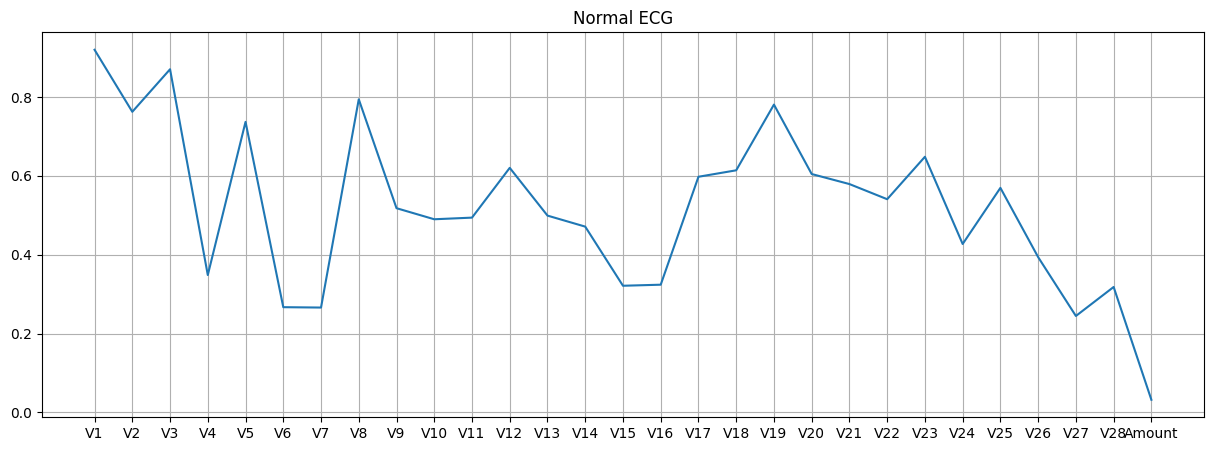

In [77]:
#Lets plot a normal ECG
plt.figure(figsize=(15,5))
plt.plot(column, n_train_data[100])
plt.grid()
plt.title('Normal ECG')
plt.show()

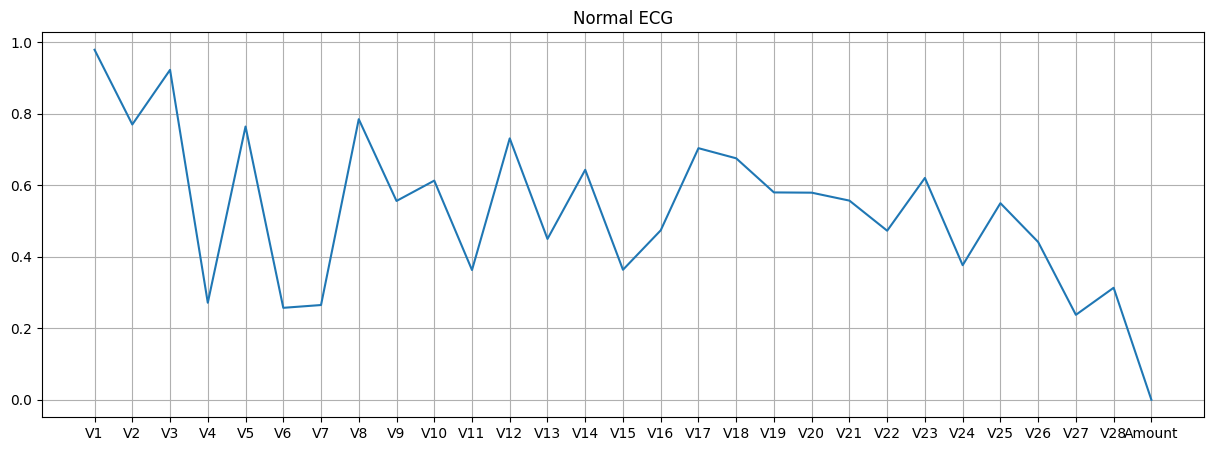

In [78]:
#Lets plot a normal ECG
plt.figure(figsize=(15,5))
plt.plot(column, an_train_data[100])
plt.grid()
plt.title('Normal ECG')
plt.show()

In [80]:
n_train_data.shape

TensorShape([383, 29])

In [81]:
n_features=29

In [82]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# Input layer
input_layer = layers.Input(shape=(n_features,))

# Encoder
encoder = layers.Dense(32, activation='relu')(input_layer)
encoder = layers.Dense(16, activation='relu')(encoder)

# Decoder
decoder = layers.Dense(32, activation='relu')(encoder)
decoder = layers.Dense(n_features, activation='sigmoid')(decoder)

# Classifier
classifier = layers.Dense(8, activation='relu')(encoder)
output_layer = layers.Dense(1, activation='sigmoid')(classifier)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Create the fraud detection model
fraud_detection_model = Model(inputs=input_layer, outputs=output_layer)


In [83]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(train_data,train_data, epochs=50, batch_size=256, validation_data=(test_data, test_data))



Epoch 1/50
891/891 [==============================] - 4s 3ms/step - loss: 0.0042 - val_loss: 0.0247
Epoch 2/50
891/891 [==============================] - 2s 2ms/step - loss: 9.8844e-04 - val_loss: 0.0247
Epoch 3/50
891/891 [==============================] - 2s 2ms/step - loss: 7.3118e-04 - val_loss: 0.0240
Epoch 4/50
891/891 [==============================] - 2s 2ms/step - loss: 6.3637e-04 - val_loss: 0.0226
Epoch 5/50
891/891 [==============================] - 2s 2ms/step - loss: 5.3545e-04 - val_loss: 0.0231
Epoch 6/50
891/891 [==============================] - 2s 2ms/step - loss: 4.9233e-04 - val_loss: 0.0214
Epoch 7/50
891/891 [==============================] - 2s 2ms/step - loss: 3.8322e-04 - val_loss: 0.0214
Epoch 8/50
891/891 [==============================] - 2s 2ms/step - loss: 3.1616e-04 - val_loss: 0.0205
Epoch 9/50
891/891 [==============================] - 2s 2ms/step - loss: 2.9095e-04 - val_loss: 0.0197
Epoch 10/50
891/891 [==============================] - 3s 3ms/step -

In [88]:
fraud_detection_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
fraud_detection_model.fit(train_data, train_labels, epochs=50, batch_size=256, validation_data=(test_data, test_labels))


Epoch 1/50
891/891 [==============================] - 4s 3ms/step - loss: 0.0158 - accuracy: 0.9976 - val_loss: 0.0084 - val_accuracy: 0.9985
Epoch 2/50
891/891 [==============================] - 2s 2ms/step - loss: 0.0059 - accuracy: 0.9987 - val_loss: 0.0053 - val_accuracy: 0.9988
Epoch 3/50
891/891 [==============================] - 2s 2ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.0047 - val_accuracy: 0.9989
Epoch 4/50
891/891 [==============================] - 2s 2ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.0047 - val_accuracy: 0.9989
Epoch 5/50
891/891 [==============================] - 2s 2ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.0050 - val_accuracy: 0.9990
Epoch 6/50
891/891 [==============================] - 2s 2ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0044 - val_accuracy: 0.9989
Epoch 7/50
891/891 [==============================] - 2s 2ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0049 - val_accuracy: 0.9990
Epoch 

In [90]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = fraud_detection_model.predict(test_data)
y_pred = (y_pred > 0.5)

print(classification_report(test_labels, y_pred))
print("AUC: ", roc_auc_score(test_labels, y_pred))


1781/1781 [==============================] - 3s 1ms/step
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     56853
        True       0.97      0.32      0.48       109

    accuracy                           1.00     56962
   macro avg       0.99      0.66      0.74     56962
weighted avg       1.00      1.00      1.00     56962

AUC:  0.6605416641049338


In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Evaluate the model on the test set
y_pred = fraud_detection_model.predict(test_data)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(test_labels, y_pred_binary)
precision = precision_score(test_labels, y_pred_binary)
recall = recall_score(test_labels, y_pred_binary)
f1 = f1_score(test_labels, y_pred_binary)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

1781/1781 [==============================] - 3s 1ms/step
Accuracy: 0.9987
Precision: 0.9722
Recall: 0.3211
F1 Score: 0.4828
